In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pydoc import help
from scipy.stats.stats import pearsonr
from sklearn.metrics import explained_variance_score
from scipy.stats import wilcoxon
import warnings
warnings.filterwarnings('ignore')
from __future__ import print_function, division

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("s2_10m_h99_predicted_observed_n24.csv", header=0)
df['res_L5'] =  df['predicted'] - df['observed']
data2 = df[['observed','predicted']].values
print (df.shape)

(37000, 4)


27.09
BIAS% = 0.02
0.77 3.092 9.558 0.002 37000
mean = 11.41
std = 6.43
min =  0.0
max =  43.35


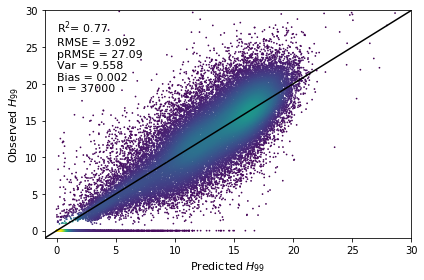

In [3]:
# selects the model using the spectral predictor variables 
y = df.observed.values
x = df.predicted.values
sumRes = df['res_L5'].sum()
"""
code to calculate the pearson's correlation coefficient and the coefficient of determination, 
the for loop extracts out the correlatin coeffiecent score which is a tuple containing the R and p value 
"""
r = pearsonr(x,y)
r2 = r[0:1]
personsr = []
for i in r:
    personsr.append(i)
r2 = personsr[0]**2
r2s = str(r2)

# calculates the variance 
meanN13error = df['res_L5'].mean()
n1 = len(df['predicted'])-1 
df['var1_l5'] = (df['res_L5']-meanN13error)**2
vari_n13 = str(df['var1_l5'].sum()/n1)

# formats the stats into strings to enable them to be put in as text in the plot
r2s = str(format(r2, '.2f'))
rmseS = str(format(np.sqrt(np.mean((y - x) ** 2)), '.3f'))
var_n13 = str(format(df['var1_l5'].sum()/n1,'.3f'))
biasS = str(format(sumRes /len(y), '.3f'))
nS = str(len(x))

# calculate the RMSE expressed as a percentage of the observed mean (RMSE%) for each response variable.

rRMSE = str(format((np.sqrt(np.mean((y - x) ** 2))/np.mean(y))*100,'.2f'))
print (rRMSE)

pbiasS = str(format(((sumRes /len(y))/(np.mean(y)))*100, '.2f'))
print ('BIAS% =', pbiasS)


format(np.mean(x) - np.mean(y), '.3f')

# Calculate the point density for the scatter plot
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# plots the data
fig, ax = plt.subplots()
ax1 = ax.scatter(x, y, c=z, s=0.5) # edgecolor='')

#fig.colorbar(ax1,ax=ax)


# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)

# text for the x and y axis
plt.ylabel('Observed $H_{99}$',fontsize=11)
plt.xlabel('Predicted $H_{99}$',fontsize=11)

# 25th percentile height

# text showing the results of the statistical analysis on the plot
plt.text(0,19, '$\mathregular{R^{2}}$= %s\nRMSE = %s\npRMSE = %s\nVar = %s\nBias = %s\nn = %s'%(r2s, rmseS,rRMSE,var_n13,biasS, nS),fontsize=11)
print (r2s, rmseS, var_n13,biasS, nS)

# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.tight_layout()

# uncomment the save figure to save out the plot
print ('mean =', y.mean().round(2))
print ('std =', y.std().round(2))
print ('min = ', y.min().round(2))
print ('max = ', y.max().round(2))
plt.savefig('PredObs_s2_10m_Validation_h99_n24_600dpi.pdf',dpi=600)
plt.show()

# stackoverflow how to change violin plot colors
https://stackoverflow.com/questions/26291479/changing-the-color-of-matplotlibs-violin-plots

In [ ]:
values = ['pre$H_{99}$', 'obs$H_{99}$','pre$H_{95}$', 'obs$H_{95}$', 'pre$H_{75}$', 'obs$H_{75}$', 'pre$H_{25}$', 'obs$H_{25}$','pre$H_{mean}$', 'obs$H_{mean}$',]
barplot.set_xticklabels(values,fontsize=36)

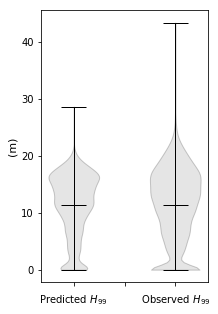

In [46]:
# Create violin plot objects:
data2 = df[['predicted','observed']].values

#pred = df[['predicted']].values
#obs = df[['observed']].values

fig, ax = plt.subplots(1, 1, figsize = (3,5))
violin_parts = ax.violinplot(data2, widths = 0.5, showmeans = True, showextrema = True, showmedians = False)

# set the x axis labels
values = []
ax.set_xticklabels(values,fontsize=14)

# Make all the violin statistics marks black:
#violin_parts['cbars']._linestyles='.'
for partname in ('cbars','cmins','cmaxes','cmeans'):
    
    vp = violin_parts[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(1)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor("grey")
    vp.set_edgecolor('k')
    vp.set_linewidth(1)
    vp.set_alpha(0.2)


# text for the x and y axis
plt.ylabel('(m)',fontsize=11)
plt.xlabel('Predicted $H_{99}$' '           '  'Observed $H_{99}$')

plt.savefig('PO_s2_10m_val01_h99_struc.pdf',dpi=600)

In [ ]:
https://stackoverflow.com/questions/42751956/creating-a-violin-plot-and-scatter-plot-with-a-shared-y-axis-in-plotly

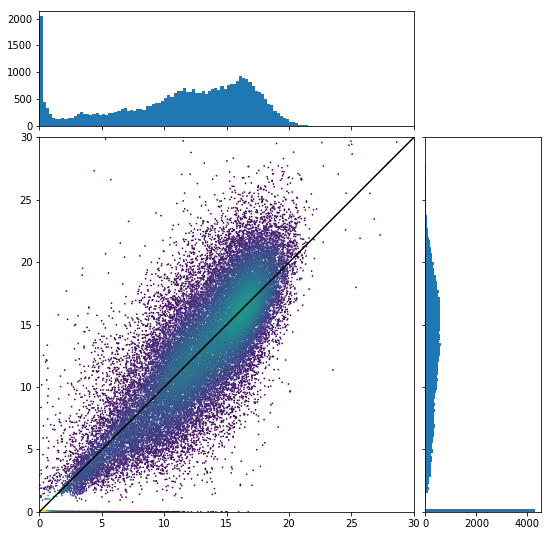

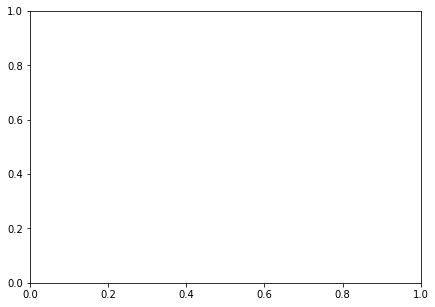

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# Fixing random state for reproducibility
#np.random.seed(19680801)


# the random data
x = df['predicted'].values
y = df['observed'].values

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
# Calculate the point density for the scatter plot
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# plots the data
fig, ax = plt.subplots(figsize = (7,5))
axScatter.scatter(x, y, c=z, s=0.5) # edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

axScatter.plot(a, b, color = 'black')

#axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((0, 30))
axScatter.set_ylim((0, 30))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

In [9]:
dir(violin_parts['cbars'])
violin_parts['cbars']._linestyles='.'

In [ ]:
#rrred = 'k'
#bluuu = 'k'

fig, ax = plt.subplots()
violin_parts = ax.violinplot(data2,showmeans=True,showmedians=False,)

for pc in violin_parts['bodies']:
    pc.set_facecolor('k')
    pc.set_edgecolor('k')

# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor('k')
    vp.set_linewidth(2)

In [ ]:
fig, ax = plt.subplots()
ax.violinplot(data2,showmeans=True,showmedians=False,)
plt.gray()
#plt.show()

In [ ]:
meanprop = dict(color='black')
patch_artist=True
# set color and plot the box plot 
color =  dict(boxes='black', whiskers='black', medians='black', caps='black')
barplot = data2.plot(kind='box',color=color, showmeans=True,figsize=(10,10),meanprops=meanprop) # , 

# axis font size
values = ['Predicted $H_{99}$', 'Observed $H_{99}$',]
barplot.set_xticklabels(values,fontsize=12)

# need to comment out the y label values when first creating the plot to see what the range of values are for the r2Vals string
r2Vals = ['0','5', '10','15','20','25','30','35', '40', '45']
barplot.set_yticklabels(r2Vals,fontsize=12)

# axis labels 
barplot.set_ylabel("(m)",fontsize = 12)
#barplot.set_xlabel('Summary statistics S2 10m predicted and observed',fontsize = 22)

# export the figure to as png at 600 dpi
fig = barplot.get_figure()

#fig.savefig('s2_10m_PreObs_SumStats.pdf',dpi=600)